In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/home/user/Downloads/hotel_bookings.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.shape

(119390, 32)

In [5]:
100 * (data.isna().sum()/len(data))

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [6]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
data['is_canceled'] = data['is_canceled'].astype(bool)

In [9]:
data['is_repeated_guest'] = data['is_repeated_guest'].astype(bool)

In [28]:
data['agent'] = data['agent'].astype(object)

In [29]:
data['children'] = data['children'].fillna(data['children'].mean())

In [30]:
data['country'] = data['country'].fillna(data['country'].mode()[0])

In [31]:
data['agent'] = data['agent'].fillna(data['agent'].mode()[0])

In [33]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [34]:
data = data.drop('company',axis=1)

In [35]:
data.shape

(119390, 31)

In [10]:
#most number of bookings per year or per month - groupby year and month - seasonality
booking_stat = data.groupby(['arrival_date_year','arrival_date_month']).size()

In [11]:
booking_stat

arrival_date_year  arrival_date_month
2015               August                3889
                   December              2920
                   July                  2776
                   November              2340
                   October               4957
                   September             5114
2016               April                 5428
                   August                5063
                   December              3860
                   February              3891
                   January               2248
                   July                  4572
                   June                  5292
                   March                 4824
                   May                   5478
                   November              4454
                   October               6203
                   September             5394
2017               April                 5661
                   August                4925
                   February              4

In [12]:
data.groupby(['arrival_date_year']).size().sort_values()

arrival_date_year
2015    21996
2017    40687
2016    56707
dtype: int64

In [13]:
data.groupby(['arrival_date_month']).size().sort_values()

arrival_date_month
January       5929
December      6780
November      6794
February      8068
March         9794
September    10508
June         10939
April        11089
October      11160
May          11791
July         12661
August       13877
dtype: int64

In [14]:
#what are the main customer type?
data['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [15]:
#which hotel has high lead time?
data.groupby('hotel').mean()['lead_time']

hotel
City Hotel      109.735724
Resort Hotel     92.675686
Name: lead_time, dtype: float64

In [16]:
data.groupby('hotel').mean()['lead_time'].head(1)

hotel
City Hotel    109.735724
Name: lead_time, dtype: float64

In [17]:
#Which hotel has maximum bookings and which has least?
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [18]:
data.groupby('hotel').size()

hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64

In [19]:
#from which country most guests come - geographic information
data.groupby('country').size()

country
ABW      2
AGO    362
AIA      1
ALB     12
AND      7
      ... 
VGB      1
VNM      8
ZAF     80
ZMB      2
ZWE      4
Length: 177, dtype: int64

In [20]:
#checking for outlier values
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

In [22]:
numcols

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


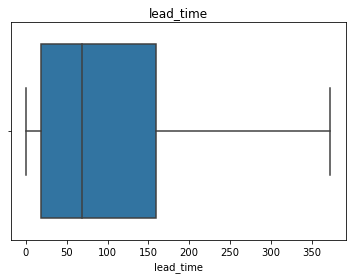

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


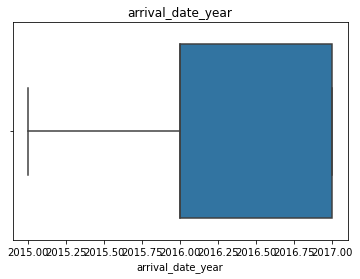

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


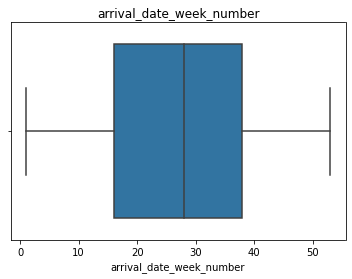

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


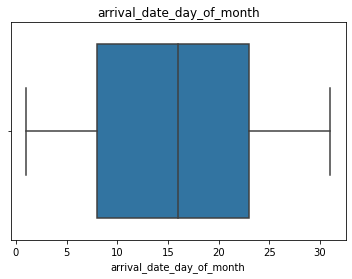

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


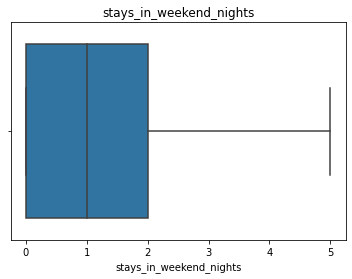

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


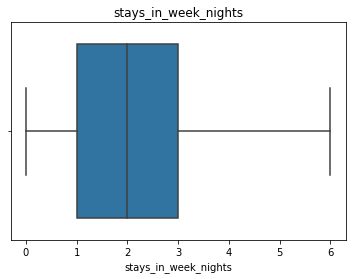

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


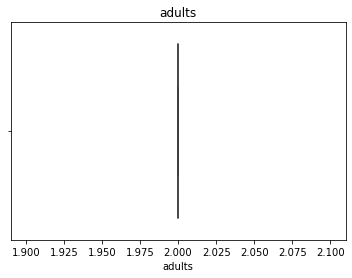

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


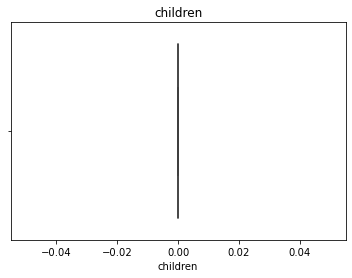

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


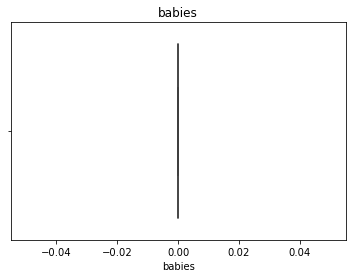

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


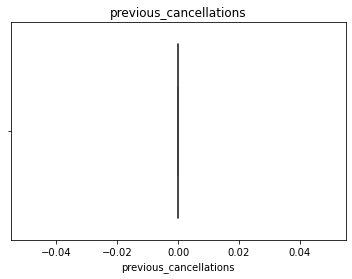

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


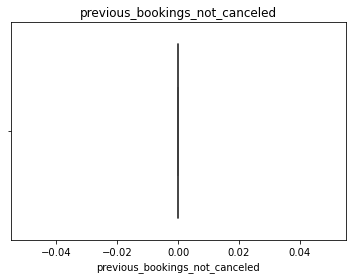

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


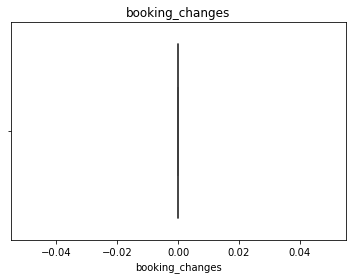

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


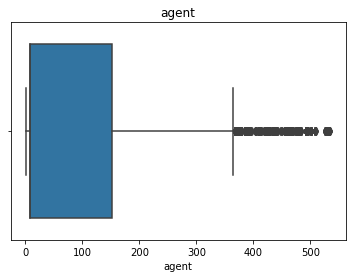

KeyError: 'company'

In [38]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [39]:
for x in numcols:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data[x][data[x]>upper_limit] = upper_limit
    data[x][data[x]<lower_limit] = lower_limit

lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
previous_cancellations
previous_bookings_not_canceled
booking_changes
agent
company


<ipython-input-39-0318679037a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit] = upper_limit
<ipython-input-39-0318679037a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]<lower_limit] = lower_limit
<ipython-input-39-0318679037a9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x][data[x]>upper_limit] = upper_limit
<ipython-input-39-0318679037a9>:9: SettingWithCopyWarning: 
A value

KeyError: 'company'

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


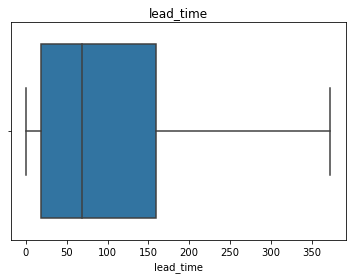

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


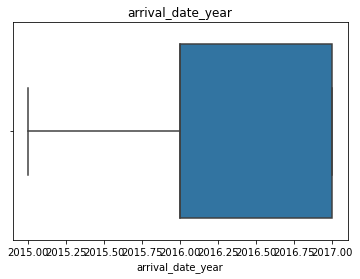

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


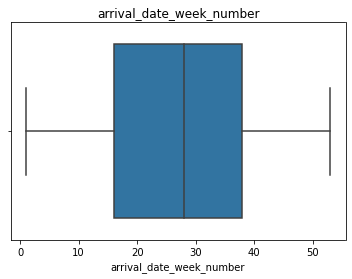

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


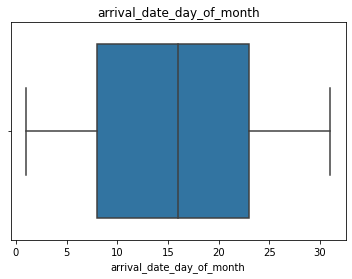

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


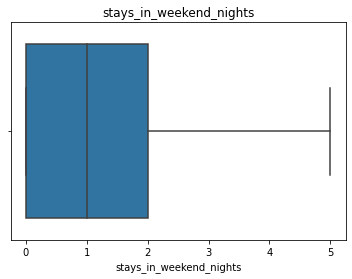

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


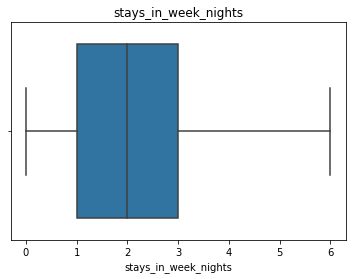

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


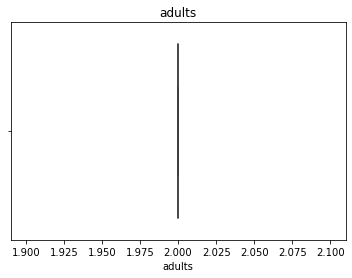

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


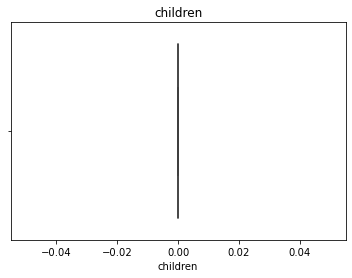

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


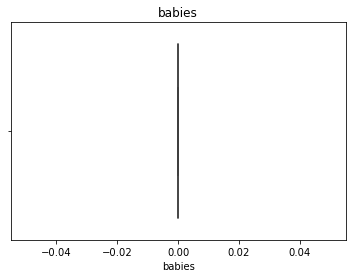

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


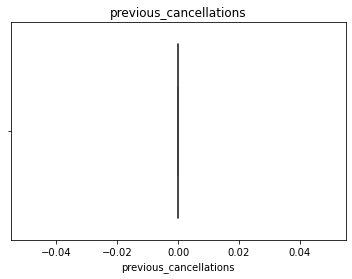

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


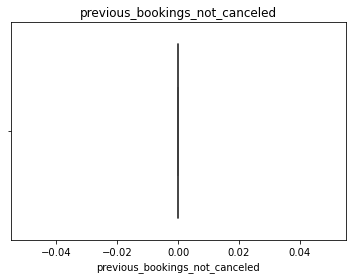

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


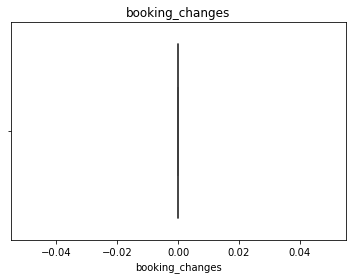

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


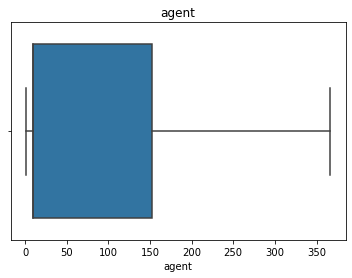

KeyError: 'company'

In [40]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [37]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,0,No Deposit,9.0,0,Transient,0.0,0,0.0,Check-Out,2015-07-01
1,Resort Hotel,False,373,2015,July,27,1,0,0,2,...,0,No Deposit,9.0,0,Transient,0.0,0,0.0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015,July,27,1,0,1,2,...,0,No Deposit,9.0,0,Transient,75.0,0,0.0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2015,July,27,1,0,1,2,...,0,No Deposit,304.0,0,Transient,75.0,0,0.0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1.0,Check-Out,2015-07-03


In [36]:
data.shape

(119390, 31)

In [41]:
pd.get_dummies(data['hotel'],drop_first=True)

,Resort Hotel
0,1
1,1
2,1
3,1
4,1
...,...
119385,0
119386,0
119387,0
119388,0


In [42]:
datadic = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
data['arrival_date_month'] = data['arrival_date_month'].map(datadic)

In [43]:
pd.get_dummies(data['reservation_status_date'],drop_first=True)

,2014-11-18,2015-01-01,2015-01-02,2015-01-18,2015-01-20,2015-01-21,2015-01-22,2015-01-28,2015-01-29,2015-01-30,...,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,2017-09-12,2017-09-14
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
119386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
119387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
119388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
data['adr']=data['adr'].astype('float64')

In [45]:
pd.get_dummies(data['customer_type'],drop_first=True)

,Group,Transient,Transient-Party
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
119385,0,1,0
119386,0,1,0
119387,0,1,0
119388,0,1,0


In [46]:
pd.get_dummies(data['country'],drop_first=True)

,AGO,AIA,ALB,AND,ARE,ARG,ARM,ASM,ATA,ATF,...,UMI,URY,USA,UZB,VEN,VGB,VNM,ZAF,ZMB,ZWE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
pd.get_dummies(data['meal'],drop_first=True)

,FB,HB,SC,Undefined
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
119385,0,0,0,0
119386,0,0,0,0
119387,0,0,0,0
119388,0,0,0,0


In [48]:
data['reserved_room_type']=data['reserved_room_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'L':12,'P':16})

In [49]:
data['assigned_room_type']=data['assigned_room_type'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8,'L':12,'P':16,'I':9,'K':11})

In [50]:
pd.get_dummies(data['deposit_type'],drop_first=True)

,Non Refund,Refundable
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
119385,0,0
119386,0,0
119387,0,0
119388,0,0


In [51]:
pd.get_dummies(data['distribution_channel'],drop_first=True)

,Direct,GDS,TA/TO,Undefined
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0
...,...,...,...,...
119385,0,0,1,0
119386,0,0,1,0
119387,0,0,1,0
119388,0,0,1,0


In [52]:
data.shape

(119390, 31)

In [53]:
pd.get_dummies(data['market_segment'],drop_first=True)

,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
119385,0,0,0,0,1,0,0
119386,0,0,0,0,0,1,0
119387,0,0,0,0,0,1,0
119388,0,0,0,0,0,1,0


In [54]:
pd.get_dummies(data['reservation_status'],drop_first=True)

,Check-Out,No-Show
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
119385,1,0
119386,1,0
119387,1,0
119388,1,0


In [56]:
data.dtypes

is_canceled                            bool
lead_time                             int64
arrival_date_year                     int64
arrival_date_month                    int64
arrival_date_week_number              int64
                                      ...  
reservation_status_date_2017-09-08    uint8
reservation_status_date_2017-09-09    uint8
reservation_status_date_2017-09-10    uint8
reservation_status_date_2017-09-12    uint8
reservation_status_date_2017-09-14    uint8
Length: 1146, dtype: object

In [57]:
y  = data['is_canceled']
X = data.drop('is_canceled',axis=1)

In [58]:
X.shape

(119390, 1145)

In [59]:
y.shape

(119390,)

In [60]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=50)

In [61]:
y_train.value_counts()

False    56355
True     33187
Name: is_canceled, dtype: int64

In [62]:
X_train.shape

(89542, 1145)

In [63]:
y_train.shape

(89542,)

In [64]:
X_test.shape

(29848, 1145)

In [65]:
y_test.shape

(29848,)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
classifier=LogisticRegression() 
classifier.fit(X_train,y_train)

/home/user/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
ypred = classifier.predict(X_test)

In [69]:
ypred

array([False, False, False, ...,  True, False, False])

In [70]:
y_test

109420    False
39184     False
90556     False
117434    False
15841     False
          ...  
82473     False
110125    False
58148      True
44992     False
63992      True
Name: is_canceled, Length: 29848, dtype: bool

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)   

0.8347292950951487

In [72]:
classifier.score(X_train,y_train) #Accurcy score for training

0.8358647338679056